# Results
- Models used with hyperparameters 
- Best Model parameters 
- Mean Cross validation score of Best model
- Test score of best model 
- Train score of best model 

Out of all the models,Voting classifier with XG Boost Classifier, Adaboost Classifier and Decision Tree Classifier works best with this dataset.

        The best model parameter:
           Voting Classifier parameters:  {'voting': [ 'hard' ]}

         Best Mean Cross-validation score: 0.8489

         Train Performance Score:  0.8926

         Test Performance Score:  0.8555

         train rmse: 0.3277

         test rmse: 0.3801

 
 However a much more simpler model that gives a better cross validation score is  XGBoost Classifier
 
         Best Cross validation Parameters: {'learning_rate': 0.2, 'max_depth': 6, 'min_child_weight': 7, 'n_estimators': 50, 'subsample': 0.9}

        Best Mean Cross-validation score: 0.8527

        Train Performance Score:  0.8851

        Test Performance Score:  0.8222

        train rmse: 0.3389

        test rmse: 0.4082




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("titanic.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# let's inspect the variable values

for var in data.columns:
    print(var, data[var].unique()[0:20], '\n')

PassengerId [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 

Survived [0 1] 

Pclass [3 1 2] 

Name ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima'] 

Sex ['male' 'female'] 

Age [22. 38. 26. 35. nan 54.  2. 27. 14.  4. 58. 20. 39. 55. 31. 34. 15. 28.
  8. 19.] 

SibSp [1 0 3 4 2 5 8] 

Parch [0 1 2 5 3 4 6] 

Ticket ['A/5 21171' 'PC 1

In [7]:
# make list of variables  types

# numerical: discrete vs continuous
discrete = [var for var in data.columns if data[var].dtype!='O' and var!='Survived' and data[var].nunique()<10]
continuous = [var for var in data.columns if data[var].dtype!='O' and var!='Survived' and var not in discrete]

# mixed
mixed = ['Cabin']

# categorical
categorical = [var for var in data.columns if data[var].dtype=='O' and var not in mixed]

print(f'There are {len(discrete)} discrete variables')
print(f'There are {len(continuous)} continuous variables')
print(f'There are {len(categorical)} categorical variables')
print(f'There are {len(mixed)} mixed variables')

There are 3 discrete variables
There are 3 continuous variables
There are 4 categorical variables
There are 1 mixed variables


In [8]:
# missing values
data.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [9]:
# cardinality (number of different categories)

data[categorical+mixed].nunique()

Name        891
Sex           2
Ticket      681
Embarked      3
Cabin       147
dtype: int64

In [10]:
# Cabin- mixed variable
# \d regular expression for digts . \d+ one or more digits
data['Cabin_num'] = data['Cabin'].str.extract('(\d+)') # captures numerical part
data['Cabin_num'] = data['Cabin_num'].astype('float')
data['Cabin_cat'] = data['Cabin'].str[0] # captures the first letter

# show dataframe
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_num,Cabin_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,85.0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,123.0,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN


In [11]:
data['Title'] = data['Name'].str.split(',').str[1].str.split('\s+').str[1]
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_num,Cabin_cat,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,85.0,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,123.0,C,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN,Mr.


In [12]:
data['Title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Major.         2
Mlle.          2
Col.           2
Mme.           1
Capt.          1
Sir.           1
Jonkheer.      1
Don.           1
the            1
Lady.          1
Ms.            1
Name: Title, dtype: int64

In [13]:
data['Cabin_cat'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin_cat, dtype: int64

In [14]:
# drop original mixed
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_num,Cabin_cat,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,85.0,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,123.0,C,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN,Mr.


In [15]:
data.drop(['PassengerId','Name','Ticket','Cabin'], axis=1,inplace=True)

In [16]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_num,Cabin_cat,Title
0,0,3,male,22.0,1,0,7.2500,S,NaN,NaN,Mr.
1,1,1,female,38.0,1,0,71.2833,C,85.0,C,Mrs.
2,1,3,female,26.0,0,0,7.9250,S,NaN,NaN,Miss.
3,1,1,female,35.0,1,0,53.1000,S,123.0,C,Mrs.
4,0,3,male,35.0,0,0,8.0500,S,NaN,NaN,Mr.


In [17]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_num
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,200.00000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,50.49000
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,35.39497
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,2.00000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,22.00000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,43.00000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,77.25000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,148.00000


In [18]:
# separate into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('Survived', axis=1),  # predictors
    data['Survived'],  # target
    test_size=0.1,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((801, 10), (90, 10))

In [19]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_num,Cabin_cat,Title
815,1,male,NaN,0,0,0.0000,S,102.0,B,Mr.
877,3,male,19.0,0,0,7.8958,S,NaN,NaN,Mr.
193,2,male,3.0,1,1,26.0000,S,2.0,F,Master.
523,1,female,44.0,0,1,57.9792,C,18.0,B,Mrs.
634,3,female,9.0,3,2,27.9000,S,NaN,NaN,Miss.


In [20]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 815 to 684
Data columns (total 10 columns):
Pclass       801 non-null int64
Sex          801 non-null object
Age          643 non-null float64
SibSp        801 non-null int64
Parch        801 non-null int64
Fare         801 non-null float64
Embarked     799 non-null object
Cabin_num    175 non-null float64
Cabin_cat    179 non-null object
Title        801 non-null object
dtypes: float64(3), int64(3), object(4)
memory usage: 68.8+ KB


In [21]:
pip install feature_engine

Note: you may need to restart the kernel to use updated packages.


In [22]:
# from feature-engine
from feature_engine import missing_data_imputers as mdi
# for one hot encoding with feature-engine
from feature_engine.categorical_encoders import OneHotCategoricalEncoder
from feature_engine.categorical_encoders import RareLabelCategoricalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [23]:
titanic_pipe = Pipeline([

    # missing data imputation 
    ('imputer_num_arbit',
     mdi.ArbitraryNumberImputer(arbitrary_number=-1,
                                variables=['Cabin_num'])),
    ('imputer_num_mean',
     mdi.MeanMedianImputer(imputation_method='mean',variables=['Age'])),
    
    ('imputer_cat_freq',
     mdi.FrequentCategoryImputer(variables=['Embarked'])),
    
    ('imputer_cat_missing',
     mdi.CategoricalVariableImputer(variables=['Cabin_cat','Title'])),

    # categorical encoding 
    ('encoder_rare_label',
     RareLabelCategoricalEncoder(tol=0.01,
                                    n_categories=4,
                                    variables=['Cabin_cat','Title'])),
    ('categorical_encoder',
     OneHotCategoricalEncoder( top_categories=None,
                               variables=['Sex', 'Embarked','Cabin_cat','Title'], # we can select which variables to encode
                               drop_last=True)),

])

In [24]:
titanic_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('imputer_num_arbit',
                 ArbitraryNumberImputer(arbitrary_number=-1,
                                        variables=['Cabin_num'])),
                ('imputer_num_mean',
                 MeanMedianImputer(imputation_method='mean',
                                   variables=['Age'])),
                ('imputer_cat_freq',
                 FrequentCategoryImputer(variables=['Embarked'])),
                ('imputer_cat_missing',
                 CategoricalVariableImputer(variables=['Cabin_cat', 'Title'])),
                ('encoder_rare_label',
                 RareLabelCategoricalEncoder(n_categories=4, tol=0.01,
                                             variables=['Cabin_cat', 'Title'])),
                ('categorical_encoder',
                 OneHotCategoricalEncoder(drop_last=True, top_categories=None,
                                          variables=['Sex', 'Embarked',
                                                    

In [25]:
# Apply Transformations
X_train=titanic_pipe.transform(X_train)
X_test=titanic_pipe.transform(X_test)

## <span class="mark">DO NOT CHANGE STEPS BEFORE THIS POINT</span>

# Logistic Regression


In [26]:
# Train a logistic regression model, report the coefficients and model performance 

# YOUR CODE HERE
# Train a logistic regression model, report the coefficients and model performance 

# YOUR CODE HERE
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
clf=scale.fit(X_train,y_train)
clf = LogisticRegression()

cv_scores = cross_val_score(clf, X_train, y_train,cv=3)
c_space = np.logspace(-3, 2, 10)
pen=['l1','l2']
param_grid = {'C': c_space,'penalty': pen,'solver':['liblinear']}

# Mean Cross validation Score
print("Mean Cross-validation scores: {}".format(cv_scores.mean()))
print("Number of Iterations:{}".format(len(cv_scores)))
print("Mean Accuracy:{}".format(cv_scores.mean()))

clf_cv=GridSearchCV(clf,param_grid,cv=5)
clf_cv=clf_cv.fit(X_train,y_train)

# Print Co-efficients
#print("Logistic.coef_:", clf.coef_)
#print("Logistic.intercept_:", clf.intercept_)

# Check test data set performance
print("Logistic Performance-train: ", clf_cv.score(X_train,y_train))
print("Logistic Performance-test: ", clf_cv.score(X_test,y_test))



Mean Cross-validation scores: 0.8264669163545569
Number of Iterations:3
Mean Accuracy:0.8264669163545569
Logistic Performance-train:  0.8339575530586767
Logistic Performance-test:  0.8555555555555555


# k NEAREST NEIGHBOURS

In [27]:
# Train a KNN model, report the coefficients, the best parameters, and model performance 
# hint: find the optimal k

# YOUR CODE HERE

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# define a list of parameters

param_knn = {'n_neighbors': range(1,10),'p':[1,10],'leaf_size':range(1,5),'algorithm':['brute'],'n_jobs':[-1]}

#apply grid search
grid_knn = GridSearchCV(knn, param_knn, cv=5, return_train_score=True)
grid_knn.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.4f}".format(grid_knn.best_score_))
print()

#find best parameters 
print('KNN parameters: ', grid_knn.best_params_)

# Check test data set performance
print("KNN Test Performance-train: ", grid_knn.score(X_train,y_train))
print("KNN Test Performance-test: ", grid_knn.score(X_test,y_test))

Best Mean Cross-validation score: 0.7441

KNN parameters:  {'algorithm': 'brute', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 3, 'p': 1}
KNN Test Performance-train:  0.8639200998751561
KNN Test Performance-test:  0.7555555555555555


# DECISION TREE CLASSIFICATION


In [28]:
# Train a Decision Tree model, report the coefficients, the best parameters, and model performance (10 points)
# hint: find the optimal max_depth

# YOUR CODE HERE
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)

#define a list of parameters
param_dtree = {'max_depth': range(1,20),'max_leaf_nodes':range(2,10),'criterion':['entropy'],'splitter':['random']}

#apply grid search
grid_dtree = GridSearchCV(dtree, param_dtree, cv=5, return_train_score = True)
grid_dtree.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_dtree.best_score_))
print()

#find best parameters
print('Decision Tree parameters: ', grid_dtree.best_params_)


# Check test data set performance
print("Decision Tree Train Performance: ", grid_dtree.score(X_train,y_train))
print("Decision Tree  Test Performance: ", grid_dtree.score(X_test,y_test))

Best Mean Cross-validation score: 0.84

Decision Tree parameters:  {'criterion': 'entropy', 'max_depth': 4, 'max_leaf_nodes': 7, 'splitter': 'random'}
Decision Tree Train Performance:  0.8314606741573034
Decision Tree  Test Performance:  0.8444444444444444


# SUPPORT VECTOR MACHINES 

In [29]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [30]:
param_grid_rbf= [{'kernel': ['rbf'],'probability':[True],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}]
#param_grid_linear=[{'kernel': ['linear'],
              # 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
              
param_grid_sig=[{'kernel': ['sigmoid'],'probability':[True],'gamma': np.logspace(-5,5,10)}]

param_grid_poly=[{'kernel':['poly'],'probability':[True],
               #'C':[0.001,0.01,0.1,0.25,0.5,1,10],
               'degree':[1,2,3]}]
               #'gamma':[0.1,1,2,5,10,50]}]
    
c=[ 0.1, 1, 10, 100]
param_LinearSVC=[{'C': c }]

#print("List of grids:\n{}".format(param_grid))

 ## SVM-RBF KERNEL

In [31]:
grid_search = GridSearchCV(SVC(), param_grid_rbf, cv=3,
                          return_train_score=True)
grid_search.fit(X_train, y_train)
print('train score: ', grid_search.score(X_train, y_train))
print('test score: ', grid_search.score(X_test, y_test))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

train score:  0.8739076154806492
test score:  0.8222222222222222
Best parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf', 'probability': True}
Best cross-validation score: 0.79


## Linear SVC

In [32]:
from sklearn.svm import LinearSVC
grid_search = GridSearchCV(SVC(kernel='linear',probability=True), param_LinearSVC, cv=3,
                          return_train_score=True)
grid_search.fit(X_train, y_train)
print('train score: ', grid_search.score(X_train, y_train))
print('test score: ', grid_search.score(X_test, y_test))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

train score:  0.8252184769038702
test score:  0.8333333333333334
Best parameters: {'C': 0.1}
Best cross-validation score: 0.82


## SVM-SIGMOID KERNEL

In [33]:
grid_search = GridSearchCV(SVC(),param_grid_sig, cv=10,
                          return_train_score=True)
grid_search.fit(X_train, y_train)
print('train score: ', grid_search.score(X_train, y_train))
print('test score: ', grid_search.score(X_test, y_test))
print("Best parameters: {}".format(grid_search.best_params_))

print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

train score:  0.6641697877652933
test score:  0.6666666666666666
Best parameters: {'gamma': 1e-05, 'kernel': 'sigmoid', 'probability': True}
Best cross-validation score: 0.66


## SVM-POLYNOMIAL KERNEL

In [34]:
grid_search = GridSearchCV(SVC(), param_grid_poly, cv=3,
                          return_train_score=True)
grid_search.fit(X_train, y_train)
print('train score: ', grid_search.score(X_train, y_train))
print('test score: ', grid_search.score(X_test, y_test))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

train score:  0.6754057428214731
test score:  0.6777777777777778
Best parameters: {'degree': 1, 'kernel': 'poly', 'probability': True}
Best cross-validation score: 0.67


The best model from HW2 was Decision Tree Classifier.Hence I ran Bagging and pasting with just the Decision Tree Classifier

# Bagging with Decision Tree Classifier

In [35]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import mean_squared_error,r2_score

from math import sqrt
bag_dtree1 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap=True, random_state=0,oob_score=True)

bag_dtree1_param = {
                'base_estimator__max_depth': range(1,10),
              'base_estimator__criterion' : ["entropy"],
              'base_estimator__splitter' :   ["random"],
              'base_estimator__max_leaf_nodes' :range(2,10),
                 #'max_samples':  [0.8,1],
                 'n_estimators': [10,25,100]
}
bag_dtree1_grid = GridSearchCV(bag_dtree1, bag_dtree1_param,cv=5, return_train_score=True, )
bag_dtree1_grid.fit(X_train,y_train)
print(bag_dtree1_grid.score(X_test,y_test))
print(f'Best Mean Cross Validation Score is {bag_dtree1_grid.best_score_}')
print(f'Best Parameter is {bag_dtree1_grid.best_params_}')
print(f'Train score is {bag_dtree1_grid.score(X_train,y_train)}')
print(f'Test score is {bag_dtree1_grid.score(X_test,y_test)}')
X_train_preds = bag_dtree1_grid.predict(X_train)
X_test_preds = bag_dtree1_grid.predict(X_test)



0.8444444444444444
Best Mean Cross Validation Score is 0.8202406832298136
Best Parameter is {'base_estimator__criterion': 'entropy', 'base_estimator__max_depth': 6, 'base_estimator__max_leaf_nodes': 9, 'base_estimator__splitter': 'random', 'n_estimators': 100}
Train score is 0.846441947565543
Test score is 0.8444444444444444


# Pasting with Decision Tree Classifier:

In [36]:
paste_dtree2 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap=False, random_state=0, oob_score=False)


paste_dtree2_param = {
                 'base_estimator__max_depth': range(1,10),
                 #'max_samples':  [0.8,1],
                 'n_estimators': [10,30,70,50,100]
}
paste_dtree2_grid = GridSearchCV(paste_dtree2, paste_dtree2_param,cv=7, return_train_score=True, )
paste_dtree2_grid.fit(X_train,y_train)
X_train_tree = paste_dtree2_grid.predict(X_train)
X_test_tree = paste_dtree2_grid.predict(X_test)



print(paste_dtree2_grid.score(X_test,y_test))
print(f'Best Mean Cross Validation Score is {paste_dtree2_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {paste_dtree2_grid.best_params_}')
print(f'Train score is {paste_dtree2_grid.score(X_train,y_train)}')
print(f'Test score is {paste_dtree2_grid.score(X_test,y_test)}')

0.8222222222222222
Best Mean Cross Validation Score is 0.826468344774981
Best Mean Cross Validation Score is {'base_estimator__max_depth': 4, 'n_estimators': 30}
Train score is 0.8576779026217228
Test score is 0.8222222222222222


# Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc =RandomForestClassifier(random_state=42)
rfc_param = { 
    'n_estimators': [100,200,300,500],
    'max_features': ['auto','sqrt','log2'],
    'max_depth' : [2,4,5,6,7,8,10],
    'criterion' :['gini', 'entropy']
}

rfc_grid = GridSearchCV(rfc, rfc_param,cv=5, return_train_score=True, )
rfc_grid.fit(X_train,y_train)
X_train_rfc = rfc_grid.predict(X_train)
X_test_rfc = rfc_grid.predict(X_test)


print(f'Best Mean Cross Validation Score is {rfc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {rfc_grid.best_params_}')
print(f'Train score is {rfc_grid.score(X_train,y_train)}')
print(f'Test score is {rfc_grid.score(X_test,y_test)}')

print(rfc_grid.score(X_test,y_test))

Best Mean Cross Validation Score is 0.8402173913043478
Best Mean Cross Validation Score is {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 200}
Train score is 0.8826466916354557
Test score is 0.8222222222222222
0.8222222222222222


# Extra trees Classifier

In [38]:
from  sklearn.ensemble import ExtraTreesClassifier
etc= ExtraTreesClassifier(random_state=42)
etc_param = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
etc_grid = GridSearchCV(etc, etc_param,cv=5, return_train_score=True, )
etc_grid.fit(X_train,y_train)
X_train_etc = etc_grid.predict(X_train)
X_test_etc = etc_grid.predict(X_test)

print(f'Best Mean Cross Validation Score is {etc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {etc_grid.best_params_}')
print(f'Train score is {etc_grid.score(X_train,y_train)}')
print(f'Test score is {etc_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8314829192546584
Best Mean Cross Validation Score is {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}
Train score is 0.885143570536829
Test score is 0.8333333333333334


# Ada Boost Classifier

In [39]:
from sklearn.ensemble import AdaBoostClassifier
adc_dtree =AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),random_state=42)
adc_dtree_param = {
              'base_estimator__criterion' : ["gini", "entropy"],
              'base_estimator__splitter' :   ["best", "random"],
              'base_estimator__max_depth' : [2,4,6],
              'n_estimators' : [100,150],
              'learning_rate': np.linspace(0.01,1,10),
             }
adc_dtree_grid = GridSearchCV(adc_dtree, adc_dtree_param,cv=5, return_train_score=True, )
adc_dtree_grid.fit(X_train,y_train)
X_train_adc = adc_dtree_grid.predict(X_train)
X_test_adc = adc_dtree_grid.predict(X_test)

# print('train mse: {}'.format(mean_squared_error(y_train, X_train_adc)))
# print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_adc))))
# print('train r2: {}'.format(r2_score(y_train, X_train_adc)))
# print()
# print('test mse: {}'.format(mean_squared_error(y_test, X_test_adc)))
# print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_adc))))
# print('test r2: {}'.format(r2_score(y_test, X_test_adc)))
print(f'Best Mean Cross Validation Score is {adc_dtree_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {adc_dtree_grid.best_params_}')
print(f'Train score is {adc_dtree_grid.score(X_train,y_train)}')
print(f'Test score is {adc_dtree_grid.score(X_test,y_test)}')


Best Mean Cross Validation Score is 0.8377096273291926
Best Mean Cross Validation Score is {'base_estimator__criterion': 'entropy', 'base_estimator__max_depth': 4, 'base_estimator__splitter': 'best', 'learning_rate': 0.01, 'n_estimators': 150}
Train score is 0.9275905118601748
Test score is 0.8222222222222222


# Gradient Boosting Classifier

In [40]:
from  sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier(random_state=42)
gbc_param = {
              'max_depth' : [2,3,4],
              'n_estimators' : [100,150],
              'learning_rate' : [0.1,0.5,1.0,2],
             }
gbc_grid = GridSearchCV(gbc, gbc_param,cv=5, return_train_score=True, )
gbc_grid.fit(X_train,y_train)
X_train_gbc = gbc_grid.predict(X_train)
X_test_gbc = gbc_grid.predict(X_test)

# print('train mse: {}'.format(mean_squared_error(y_train, X_train_gbc)))
# print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_gbc))))
# print('train r2: {}'.format(r2_score(y_train, X_train_gbc)))
# print()
# print('test mse: {}'.format(mean_squared_error(y_test, X_test_gbc)))
# print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_gbc))))
# print('test r2: {}'.format(r2_score(y_test, X_test_gbc)))
print(f'Best Mean Cross Validation Score is {gbc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {gbc_grid.best_params_}')
print(f'Train score is {gbc_grid.score(X_train,y_train)}')
print(f'Test score is {gbc_grid.score(X_test,y_test)}')


Best Mean Cross Validation Score is 0.8426940993788821
Best Mean Cross Validation Score is {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
Train score is 0.9400749063670412
Test score is 0.7888888888888889


In [41]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


# XG Boosting Classifier

In [42]:
from  xgboost import XGBClassifier
xgbc= XGBClassifier(random_state=42,early_stopping_rounds=2,objective= 'binary:logistic')
xgbc_param = {
              'max_depth' : [2,4,6,8],
              'n_estimators' : [25,50,100,150],
              'learning_rate' : [0.05,0.09,0.1,0.2,0.5],
               'min_child_weight' : [1,3,5,7],
               'subsample':[0.6,0.7,0.8,0.9,1]
             }
xgbc_grid = GridSearchCV(xgbc, xgbc_param,cv=5, return_train_score=True, )
xgbc_grid.fit(X_train,y_train)
X_train_xgbc = etc_grid.predict(X_train)
X_test_xgbc = etc_grid.predict(X_test)

# print('train mse: {}'.format(mean_squared_error(y_train, X_train_xgbc)))

# print('train r2: {}'.format(r2_score(y_train, X_train_xgbc)))
# print()
# print('test mse: {}'.format(mean_squared_error(y_test, X_test_xgbc)))

# print('test r2: {}'.format(r2_score(y_test, X_test_xgbc)))
print(f'Best Mean Cross Validation Score is {xgbc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {xgbc_grid.best_params_}')
print(f'Train score is {xgbc_grid.score(X_train,y_train)}')
print(f'Test score is {xgbc_grid.score(X_test,y_test)}')


Best Mean Cross Validation Score is 0.8526708074534162
Best Mean Cross Validation Score is {'learning_rate': 0.2, 'max_depth': 6, 'min_child_weight': 7, 'n_estimators': 50, 'subsample': 0.9}
Train score is 0.885143570536829
Test score is 0.8222222222222222


In [75]:
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_xgbc))))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_xgbc))))

train rmse: 0.3389047498386103
test rmse: 0.408248290463863


In [43]:
classifiers={'knn':grid_knn ,
             #'logreg':clf,
             'dtree':grid_dtree,
             'svm':grid_search,
             #'dtree':dtree_grid,
             'bag_dtree1':bag_dtree1_grid,
             'paste_dtree1':paste_dtree2_grid,
             'rfc': rfc_grid,
             'etc': etc_grid,
             'adc_dtree':adc_dtree_grid,
             'gbc': gbc_grid,
             'xgbc': xgbc_grid}

In [44]:
classifiers.keys()

dict_keys(['knn', 'dtree', 'svm', 'bag_dtree1', 'paste_dtree1', 'rfc', 'etc', 'adc_dtree', 'gbc', 'xgbc'])

In [45]:
results_mean_std = []
for  key, value in classifiers.items():
    mean = value.cv_results_['mean_test_score'][value.best_index_]
    std=value.cv_results_['std_test_score'][value.best_index_]
     
    results_mean_std.append({
        "model": key,
        "mean": mean,
        "std": std
    })

In [46]:
accuracy_df = pd.DataFrame(results_mean_std, columns=['model', 'mean', 'std'])


In [47]:
accuracy_df.sort_values(by=['mean'], inplace=True,ascending=False)
accuracy_df

,model,mean,std
9,xgbc,0.852671,0.022647
8,gbc,0.842694,0.016028
5,rfc,0.840217,0.017764
7,adc_dtree,0.837710,0.020858
1,dtree,0.836483,0.024908
6,etc,0.831483,0.020331
4,paste_dtree1,0.826468,0.025792
3,bag_dtree1,0.820241,0.022005
0,knn,0.744084,0.028365
2,svm,0.674157,0.006116


In [48]:
predictions_all = {}
for  key, value in classifiers.items():
    # Get best estimator
    best_model = value.best_estimator_
    
    # Predict test labels
    predictions = best_model.predict(X_test)
    
    # Save predictions to a list
    predictions_all[key] = predictions

In [49]:
pred = pd.DataFrame(predictions_all)

Text(0.5, 1, 'Correlation of the test set label prediction between models')

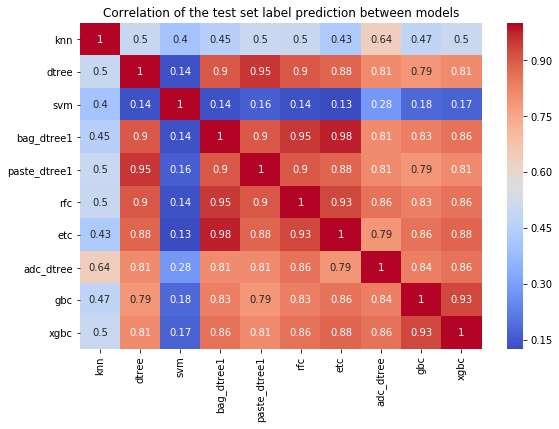

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,6))
g = sns.heatmap(pred.corr(), annot=True, cmap='coolwarm', ax=ax)
g.set_title('Correlation of the test set label prediction between models')

In [51]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=True)
    return au_corr[0:n]



In [78]:
print("Least Absolute Correlations")
print(get_top_abs_correlations(pred, 5))

Least Absolute Correlations
svm    etc             0.126046
dtree  svm             0.138343
svm    rfc             0.138343
       bag_dtree1      0.138343
       paste_dtree1    0.163678
dtype: float64


# Voting Classifier- Top 5 models

In [53]:
from sklearn.ensemble import VotingClassifier

In [54]:
vclf1 = VotingClassifier(estimators=
                              [('xgbc', xgbc_grid.best_estimator_), 
                                ('rfc', rfc_grid.best_estimator_), 
                               ('gbc', gbc_grid.best_estimator_),
                               ('adc_dtree',adc_dtree_grid.best_estimator_),
                               ('dtree', grid_dtree.best_estimator_)
                              ], )
vclf1_param = {
              'voting' : ['hard','soft'],
             }
vclf1_grid = GridSearchCV(vclf1, vclf1_param,cv=5, return_train_score=True, )
vclf1_grid.fit(X_train,y_train)

X_test_preds = vclf1_grid.predict(X_test)

print(f'Best Mean Cross Validation Score is {vclf1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {vclf1_grid.best_params_}')
print(f'Train score is {vclf1_grid.score(X_train,y_train)}')
print(f'Test score is {vclf1_grid.score(X_test,y_test)}')
#print(f'Val score is {vclf1_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8502018633540374
Best Mean Cross Validation Score is {'voting': 'hard'}
Train score is 0.9038701622971286
Test score is 0.8333333333333334


On running the above model excluding random forest and Gradient Boosting, better score is obtained

In [76]:
vclf1 = VotingClassifier(estimators=
                              [('xgbc', xgbc_grid.best_estimator_), 
                                #('rfc', rfc_grid.best_estimator_), 
                               #('gbc', gbc_grid.best_estimator_),
                               ('adc_dtree',adc_dtree_grid.best_estimator_),
                               ('dtree', grid_dtree.best_estimator_)
                              ], )
vclf1_param = {
              'voting' : ['hard','soft'],
             }
vclf1_grid = GridSearchCV(vclf1, vclf1_param,cv=5, return_train_score=True, )
vclf1_grid.fit(X_train,y_train)
X_train_preds = vclf1_grid.predict(X_train)
X_test_preds = vclf1_grid.predict(X_test)

print(f'Best Mean Cross Validation Score is {vclf1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {vclf1_grid.best_params_}')
print(f'Train score is {vclf1_grid.score(X_train,y_train)}')
print(f'Test score is {vclf1_grid.score(X_test,y_test)}')
#print(f'Val score is {vclf1_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8489518633540374
Best Mean Cross Validation Score is {'voting': 'hard'}
Train score is 0.8926342072409488
Test score is 0.8555555555555555


In [77]:
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))

train rmse: 0.3276671981737738
test rmse: 0.38005847503304596


# Voting Classifier- Least Correlated

In [56]:
vclf3 = VotingClassifier(estimators=
                              [
                               ('etc', etc_grid.best_estimator_), 
                               ('rfc', rfc_grid.best_estimator_),
                               ('svm', grid_search.best_estimator_),
                               ('dtree', grid_dtree.best_estimator_),
                              ], )
vclf3_param = {
              'voting' : ['hard','soft'],
             }
vclf3_grid = GridSearchCV(vclf3, vclf3_param,cv=5, return_train_score=True, )
vclf3_grid.fit(X_train,y_train)
print(f'Best Mean Cross Validation Score is {vclf3_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {vclf3_grid.best_params_}')
print(f'Train score is {vclf3_grid.score(X_train,y_train)}')
print(f'Test score is {vclf3_grid.score(X_test,y_test)}')
#print(f'Val score is {vclf3_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.8302329192546584
Best Mean Cross Validation Score is {'voting': 'hard'}
Train score is 0.8689138576779026
Test score is 0.8333333333333334


In [58]:
vclf3 = VotingClassifier(estimators=
                              [ 
                               ('etc', etc_grid.best_estimator_), 
                               ('rfc', rfc_grid.best_estimator_),
                               ('svm', grid_search.best_estimator_),
                               ('dtree', grid_dtree.best_estimator_),
                              ], )
vclf3_param = {
              'voting' : ['hard','soft'],
             }
vclf3_grid = GridSearchCV(vclf3, vclf3_param,cv=5, return_train_score=True, )
vclf3_grid.fit(X_train,y_train)
print(f'Best Mean Cross Validation Score is {vclf3_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {vclf3_grid.best_params_}')
print(f'Train score is {vclf3_grid.score(X_train,y_train)}')
print(f'Test score is {vclf3_grid.score(X_test,y_test)}')
#print(f'Val score is {vclf3_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.8302329192546584
Best Mean Cross Validation Score is {'voting': 'hard'}
Train score is 0.8689138576779026
Test score is 0.8333333333333334


# Stacking Classifier-Top 5 Models

In [59]:
from sklearn.ensemble import StackingClassifier

In [74]:
sclf1 = StackingClassifier(estimators=
                              [('xgbc', xgbc_grid.best_estimator_), 
                                ('rfc', rfc_grid.best_estimator_), 
                               ('gbc', gbc_grid.best_estimator_),
                               ('adc_dtree',adc_dtree_grid.best_estimator_),
                               ('dtree', grid_dtree.best_estimator_)
                              ], final_estimator=DecisionTreeClassifier())
sclf1_param = {
              'final_estimator__criterion' : ["gini", "entropy"],
              'final_estimator__splitter' :   ["best", "random"],
                 'final_estimator__max_depth' : [2,4,6],

              }
sclf1_grid = GridSearchCV(sclf1, sclf1_param,cv=5, return_train_score=True, )
sclf1_grid.fit(X_train,y_train)
print(f'Best Mean Cross Validation Score is {sclf1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {sclf1_grid.best_params_}')
print(f'Train score is {sclf1_grid.score(X_train,y_train)}')
print(f'Test score is {sclf1_grid.score(X_test,y_test)}')
#print(f'Val score is {sclf1_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.8314596273291925
Best Mean Cross Validation Score is {'final_estimator__criterion': 'gini', 'final_estimator__max_depth': 2, 'final_estimator__splitter': 'random'}
Train score is 0.8664169787765293
Test score is 0.7777777777777778


On running the above model excluding random forest and gradient boosting, better score is obtained

In [71]:
sclf1 = StackingClassifier(estimators=
                              [('xgbc', xgbc_grid.best_estimator_), 
                                #('rfc', rfc_grid.best_estimator_), 
                               #('gbc', gbc_grid.best_estimator_),
                               ('adc_dtree',adc_dtree_grid.best_estimator_),
                               ('dtree', grid_dtree.best_estimator_)
                              ], final_estimator=DecisionTreeClassifier())
sclf1_param = {
              'final_estimator__criterion' : ["gini", "entropy"],
               'final_estimator__splitter' :   ["best", "random"],
                'final_estimator__max_depth' : [2,4,6],

              }
sclf1_grid = GridSearchCV(sclf1, sclf1_param,cv=5, return_train_score=True, )
sclf1_grid.fit(X_train,y_train)
print(f'Best Mean Cross Validation Score is {sclf1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {sclf1_grid.best_params_}')
print(f'Train score is {sclf1_grid.score(X_train,y_train)}')
print(f'Test score is {sclf1_grid.score(X_test,y_test)}')
#print(f'Val score is {sclf1_grid.score(X_val,y_val)}')



Best Mean Cross Validation Score is 0.8427018633540373
Best Mean Cross Validation Score is {'final_estimator__criterion': 'gini', 'final_estimator__max_depth': 2, 'final_estimator__splitter': 'best'}
Train score is 0.8863920099875156
Test score is 0.8222222222222222


# Stacking Classifier-Least Correlated

In [72]:
sclf2 = StackingClassifier(estimators=
                              [ ('etc', etc_grid.best_estimator_), 
                               ('rfc', rfc_grid.best_estimator_),
                               ('paste_dtree1', paste_dtree2_grid.best_estimator_),
                               ('bag_dtree1', bag_dtree1_grid.best_estimator_),
                                                             ], 
                           final_estimator=ExtraTreesClassifier())
sclf2_param = {
              'final_estimator__max_depth' : [2,4,5,6,7,8],
               'final_estimator__n_estimators' : [200,500],
               #'final_estimator__max_features': ['auto', 'sqrt', 'log2'],
               #'final_estimator__criterion' :['gini', 'entropy'],
              
             }
sclf2_grid = GridSearchCV(sclf2, sclf2_param,cv=5, return_train_score=True, )
sclf2_grid.fit(X_train,y_train)
print(f'Best Mean Cross Validation Score is {sclf2_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {sclf2_grid.best_params_}')
print(f'Train score is {sclf2_grid.score(X_train,y_train)}')
print(f'Test score is {sclf2_grid.score(X_test,y_test)}')
#print(f'Val score is {sclf2_grid.score(X_val,y_val)}')


# 'n_estimators': [200, 500],
#     ,
#     'max_depth' : [2,4,5,6,7,8],
#     'criterion' :['gini', 'entropy']


Best Mean Cross Validation Score is 0.8289829192546584
Best Mean Cross Validation Score is {'final_estimator__max_depth': 2, 'final_estimator__n_estimators': 500}
Train score is 0.867665418227216
Test score is 0.8555555555555555
